In [146]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [147]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


## Task #1: Clean up the data
- Are there missing values?
- Standardize categories in region
- Standardize charges data type (float)
- Standardize sex to just two categories
- Change smoker to boolean
- Standardize charges data type (float)

In [148]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [149]:
insurance_filled = insurance.dropna()
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [150]:
insurance_filled['region'] = insurance_filled['region'].str.lower()
insurance_filled['region'].unique()

C:\Users\ROG\AppData\Local\Temp\ipykernel_34448\634417061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region'] = insurance_filled['region'].str.lower()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [151]:
insurance_filled['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [152]:
FEMALE = 'female'
MALE = 'male'
sex_map = {"F":FEMALE, 'woman':FEMALE, 'man':MALE, 'M':MALE}
insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)
insurance_filled['sex'].unique()

C:\Users\ROG\AppData\Local\Temp\ipykernel_34448\1955147474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)


array(['female', 'male'], dtype=object)

In [153]:
insurance_filled['smoker'] = insurance_filled['smoker'].str.lower()
insurance_filled['smoker'] = (insurance_filled['smoker']== "yes")

C:\Users\ROG\AppData\Local\Temp\ipykernel_34448\3976850098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['smoker'] = insurance_filled['smoker'].str.lower()
C:\Users\ROG\AppData\Local\Temp\ipykernel_34448\3976850098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['smoker'] = (insurance_filled['smoker']== "yes")


In [154]:
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 67.2+ KB


In [155]:
insurance_filled["charges"] = insurance_filled['charges'].str.strip("$").astype(float)
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


C:\Users\ROG\AppData\Local\Temp\ipykernel_34448\135257846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled["charges"] = insurance_filled['charges'].str.strip("$").astype(float)


In [156]:
insurance_pos =  insurance_filled.apply(lambda x:x.abs() if np.issubdtype(x.dtype, np.number) else x)

In [157]:
insurance_pos.to_csv('insurance_cleaned.csv', index=False)

## Task #2: Scatterplots of relationship between variables and charges

In [158]:
import matplotlib.pyplot as plt

df = insurance_pos.copy()

In [159]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

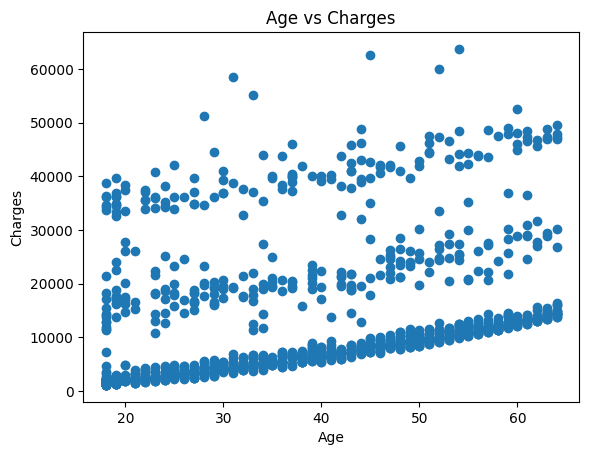

In [160]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.savefig('Figures/age_vs_charges.png')
plt.show()

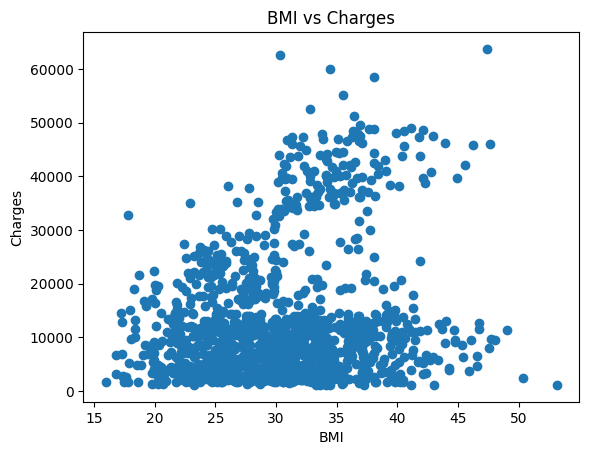

In [161]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.savefig('Figures/bmi_vs_charges.png')
plt.show()

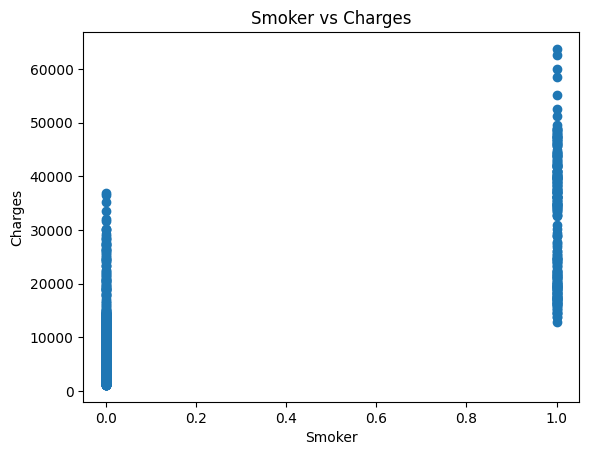

In [162]:
plt.scatter(df['smoker'], df['charges'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs Charges')
plt.savefig("Figures/smoker_vs_charges.png")
plt.show()

### Task #3 - Prepare the data for model fitting

In [163]:
def preprocess_data(df):
    df_new = pd.get_dummies(df,columns=["region"], prefix="region",dtype=int)
    df_new = df_new.drop(columns=["region_northwest"])
    df_new['smoker'] = df_new['smoker'].astype(int)
    df_new["is_male"] = (df_new["sex"] == "male").astype(int)
    df_new = df_new.drop(columns=["sex"])
    df_new = df_new.dropna()
    return df_new

df_new = preprocess_data(df)
df_new.head()


,age,bmi,children,smoker,charges,region_northeast,region_southeast,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,33.770,1.0,0,1725.55230,0,1,0,1
2,28.0,33.000,3.0,0,4449.46200,0,1,0,1
3,33.0,22.705,0.0,0,21984.47061,0,0,0,1
4,32.0,28.880,0.0,0,3866.85520,0,0,0,1


In [164]:
from sklearn.model_selection import train_test_split
X = df_new.drop(columns=["charges"])
y = df_new["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [166]:
y_pred = model.predict(X_test)

In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 4378.723562983686
Mean Squared Error: 39936613.36311094
R^2 Score: 0.7049323160872818


In [168]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 4476.571576807753
Mean Squared Error: 44110345.687244676
R^2 Score: 0.674095111165661


In [169]:
from sklearn.tree import DecisionTreeRegressor
values = []
for i in range(1,10):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    values.append((i,mae, mse, r2))

values_df = pd.DataFrame(values, columns=["Max_depth","MAE", "MSE", "R2"])
values_df.index = range(1,10)


In [170]:
values_df = values_df.sort_values(by="R2", ascending=False)
values_df

,Max_depth,MAE,MSE,R2
4,4,2657.559415,2.119548e+07,0.843399
5,5,2622.228560,2.132614e+07,0.842434
3,3,2985.179281,2.231552e+07,0.835124
6,6,2603.551591,2.265734e+07,0.832598
2,2,3456.517165,2.458664e+07,0.818344
7,7,2955.278606,3.261337e+07,0.759039
8,8,2992.059393,3.694150e+07,0.727061
9,9,3123.209544,3.957668e+07,0.707592
1,1,5819.622615,5.714020e+07,0.577825


### Task #5: See how model perform on validation dataset
- Create helper function to preprocess dataframe

In [171]:
val_df = pd.read_csv("validation_dataset.csv")
val_df.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [172]:
def preprocess_data(df):
    df['region'] = df['region'].str.lower()

    FEMALE = 'female'
    MALE = 'male'
    sex_map = {"F":FEMALE, 'woman':FEMALE, 'man':MALE, 'M':MALE}
    df['sex'] = df['sex'].replace(sex_map)

    df['smoker'] = df['smoker'].str.lower()
    df['smoker'] = (df['smoker']== "yes")

    df =  df.apply(lambda x:x.abs() if np.issubdtype(x.dtype, np.number) else x)

    df_new = pd.get_dummies(df,columns=["region"], prefix="region",dtype=int)
    df_new = df_new.drop(columns=["region_northwest"])
    df_new['smoker'] = df_new['smoker'].astype(int)
    df_new["is_male"] = (df_new["sex"] == "male").astype(int)
    df_new = df_new.drop(columns=["sex"])
    df_new = df_new.dropna()
    return df_new


In [173]:
df_val = preprocess_data(val_df)
df_val.head()

,age,bmi,children,smoker,region_northeast,region_southeast,region_southwest,is_male
0,18.0,24.090000,1.0,0,0,1,0,0
1,39.0,26.410000,0.0,1,1,0,0,1
2,27.0,29.150000,0.0,1,0,1,0,1
3,71.0,65.502135,13.0,1,0,1,0,1
4,28.0,38.060000,0.0,0,0,1,0,1


In [ ]:
depth4_model = DecisionTreeRegressor(max_depth=4)
depth4_model.fit(X_train, y_train)
y_val_pred = depth4_model.predict(df_val)
df_pred = pd.DataFrame(y_val_pred, columns=["Predicted_Charges"])
df_pred.head()

,Predicted_Charges
0,2339.150918
1,20247.136550
2,17138.857137
3,63770.428010
4,5503.581169


In [182]:
df_pred[df_pred["Predicted_Charges"] < 1000] = 1000
final = pd.concat([df_val.reset_index(drop=True), df_pred], axis=1)

In [183]:
final.head()

,age,bmi,children,smoker,region_northeast,region_southeast,region_southwest,is_male,Predicted_Charges
0,18.0,24.090000,1.0,0,0,1,0,0,2339.150918
1,39.0,26.410000,0.0,1,1,0,0,1,20247.136550
2,27.0,29.150000,0.0,1,0,1,0,1,17138.857137
3,71.0,65.502135,13.0,1,0,1,0,1,63770.428010
4,28.0,38.060000,0.0,0,0,1,0,1,5503.581169
